<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_VectorCalculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vector Calculus in Machine Learning**

While linear algebra offers the language to represent data and transformations (the "what" of machine learning), vector calculus offers the machinery to update parameters and improve models (the "how" of learning).

Without calculus, we would be unable to perform gradient descent, the workhorse algorithm of modern AI, nor would we be able to understand the curvature of loss landscapes, the stability of training dynamics, or the mechanics of backpropagation.

## **1. Differentiation of Univariate Functions:**

Before we can manage the complexity of millions of parameters in a neural network, we must master the behavior of functions with a single input and output. The study of univariate differentiation provides the fundamental intuition for sensitivity analysis: how much does the output change if I nudge the input slightly?

**1.1. The Difference Quotient and Derivative Definition**

Imagine you are driving a car along a straight highway.

- The function $f(x)$ represents your distance from home at time $x$.

- The Function Value ($f(x)$): "At 2:00 PM, I am 50 miles from home."

- The Difference Quotient (Average Speed): If you look at your position at 2:00 PM and 3:00 PM, you can calculate your average speed. "I traveled 60 miles in 1 hour, so my average speed was 60 mph." This is the slope of the secant line between two points. It gives you a rough idea of your motion, but it misses the details—you might have stopped for coffee or sped up to pass a truck.

- The Derivative (Instantaneous Speed): Now, imagine measuring your average speed over a shorter interval—1 minute, then 1 second, then 1 millisecond. As the time interval becomes infinitesimally small, you are no longer calculating an average over a duration but checking your instantaneous speed at that exact moment. This is what your speedometer reads. The derivative is simply the mathematical speedometer of the function.

In machine learning, we use this "speedometer" to determine which direction to adjust a parameter. If the "speed" (gradient) is positive, it means increasing the parameter increases the function value (error). Since we want to minimize error, we simply drive in the opposite direction.


**1.2 Numerical Differentiation and Stability**

While symbolic differentiation gives us exact formulas (e.g., the derivative of $x^2$ is $2x$), computers often rely on numerical approximations using the difference quotient with a very small $h$.

This is crucial for "gradient checking," a technique used to verify that an analytic gradient implementation is correct.

However, implementing this on a digital computer introduces the problem of numerical instability.

- If $h$ is chosen too large, the approximation error (truncation error) is high because the secant line does not match the tangent.
- If $h$ is chosen too small, we encounter floating-point round-off error.

Computers have finite precision (typically 64-bit or 32-bit floats). Subtracting two extremely close numbers ($f(x+h)$ and $f(x)$) results in the loss of significant digits, leading to catastrophic noise in the derivative calculation.


## *Finite Differences*

The following code demonstrates the implementation of numerical differentiation and visualizes the tangent line.

Function: f(x) = x^2
Point of evaluation: x = 3.0
Numerical Derivative (approx): 6.00001
Analytical Derivative (exact): 6.0
Error: 0.0000100000


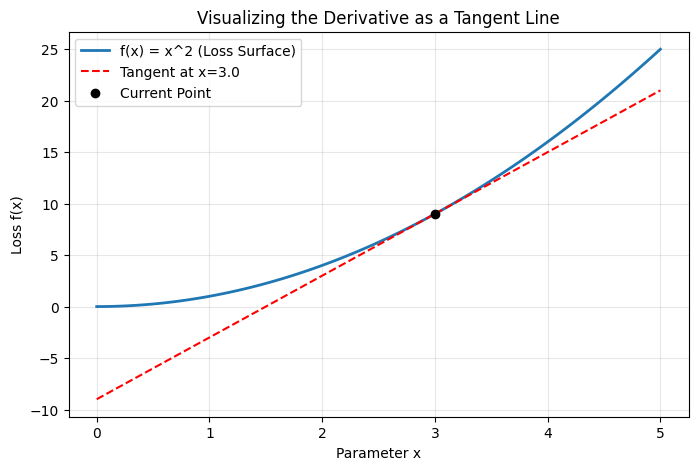

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_derivative_numerically(f, x, h=1e-5):
    """
    Computes the numerical derivative of a 1D function f at point x
    using the finite difference method (forward difference).

    Args:
        f (callable): The univariate function to differentiate.
        x (float): The point at which to evaluate the derivative.
        h (float): A small step size (epsilon) for the limit approximation.

    Returns:
        float: The approximate derivative.
    """
    # Calculate the rise (change in f) over the run (change in x)
    # This approximates the limit definition of the derivative.
    return (f(x + h) - f(x)) / h

# --- Example Usage ---

# 1. Define a simple quadratic function: f(x) = x^2
# In ML, this could represent a simplified squared error loss function.
def my_square_function(x):
    return x**2

# 2. Analytical Truth
# We know analytically that f'(x) = 2x.
# Let's check at x = 3. The exact answer should be 6.
x_point = 3.0
analytical_deriv = 2 * x_point

# 3. Numerical Approximation
approx_deriv = get_derivative_numerically(my_square_function, x_point)

print(f"Function: f(x) = x^2")
print(f"Point of evaluation: x = {x_point}")
print(f"Numerical Derivative (approx): {approx_deriv:.5f}")
print(f"Analytical Derivative (exact): {analytical_deriv}")
print(f"Error: {abs(approx_deriv - analytical_deriv):.10f}")

# 4. Visualization of the Tangent Line
# We plot the function and the tangent line derived from our numerical slope.
x_vals = np.linspace(0, 5, 100)
y_vals = my_square_function(x_vals)

# Tangent line equation: y = f(a) + f'(a)(x - a)
# Here a = x_point (3.0)
y_tangent = my_square_function(x_point) + approx_deriv * (x_vals - x_point)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = x^2 (Loss Surface)", linewidth=2)
plt.plot(x_vals, y_tangent, '--', color='red', label=f"Tangent at x={x_point}")
plt.scatter([x_point], [my_square_function(x_point)], color='black', zorder=5, label="Current Point")
plt.title("Visualizing the Derivative as a Tangent Line")
plt.xlabel("Parameter x")
plt.ylabel("Loss f(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Task 1.1: Exploring Numerical Instability

Empirically determine the optimal step size $h$ for numerical differentiation, balancing truncation error against round-off error.

1. Setup: Define the function $f(x) = \sin(x)$.
We know the analytical derivative is $f'(x) = \cos(x)$.

2. Experiment: Compute the numerical derivative at $x = 1.0$ for a range of $h$ values spanning from $10^{-1}$ down to $10^{-16}$.

3. Analysis: Calculate the absolute error between your numerical derivative and the exact value ($\cos(1.0)$) for each $h$.

4. Visualization: Plot log10(error) vs log10(h).

5. Conclusion: Identify the value of $h$ that minimizes error. Explain why the error increases as $h$ gets extremely small (below $10^{-10}$).

In [ ]:
#REFER SAMPLE CODE
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Function and Derivative
def f_sin(x):
    return np.sin(x)

def analytical_deriv_sin(x):
    return np.cos(x)

# 2. Define Experiment Parameters
# We use logspace to generate h values: 10^-1, 10^-2,..., 10^-16
h_values = np.logspace(-1, -16, 16)
x_target = 1.0
exact_val = analytical_deriv_sin(x_target)

errors = []

# 3. Execution Loop
print(f"{'h_value':<20} | {'Approx Deriv':<20} | {'Absolute Error':<20}")
print("-" * 65)

for h in h_values:
    # Use the numerical differentiation function defined previously
    val_approx = get_derivative_numerically(f_sin, x_target, h)

    # Compute absolute error
    error = abs(val_approx - exact_val)
    errors.append(error)

    print(f"{h:<20.1e} | {val_approx:<20.10f} | {error:<20.10e}")

h_value              | Approx Deriv         | Absolute Error      
-----------------------------------------------------------------
1.0e-01              | 0.4973637525         | 4.2938553333e-02    
1.0e-02              | 0.5360859810         | 4.2163248563e-03    
1.0e-03              | 0.5398814804         | 4.2082550781e-04    
1.0e-04              | 0.5402602314         | 4.2074449519e-05    
1.0e-05              | 0.5402980985         | 4.2073622750e-06    
1.0e-06              | 0.5403018851         | 4.2074680939e-07    
1.0e-07              | 0.5403022640         | 4.1827691089e-08    
1.0e-08              | 0.5403023029         | 2.9698852266e-09    
1.0e-09              | 0.5403023584         | 5.2541266005e-08    
1.0e-10              | 0.5403022474         | 5.8481036458e-08    
1.0e-11              | 0.5403011372         | 1.1687040611e-06    
1.0e-12              | 0.5403455461         | 4.3240216924e-05    
1.0e-13              | 0.5395683900         | 7.3391590031e-04 

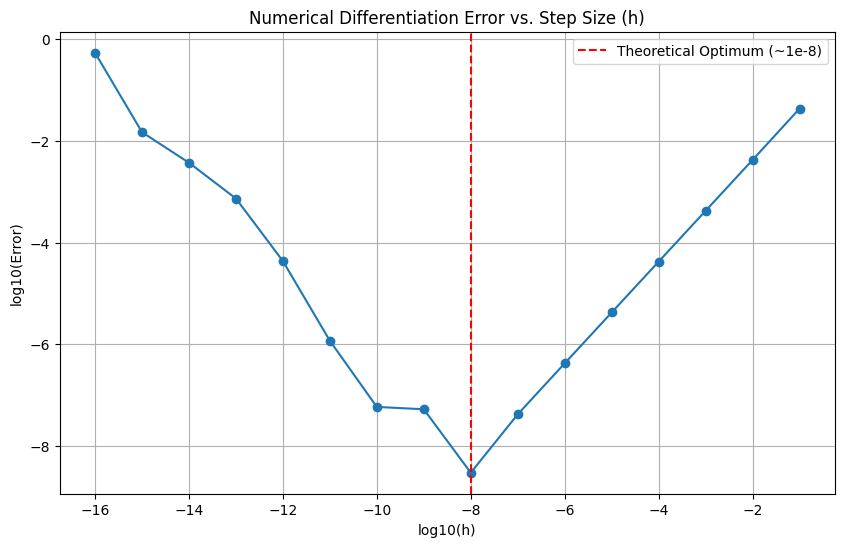

In [ ]:
# 4. Visualization
plt.figure(figsize=(10, 6))
plt.plot(np.log10(h_values), np.log10(errors), marker='o', linestyle='-')
plt.title("Numerical Differentiation Error vs. Step Size (h)")
plt.xlabel("log10(h)")
plt.ylabel("log10(Error)")
plt.grid(True)
plt.axvline(x=-8, color='r', linestyle='--', label='Theoretical Optimum (~1e-8)')
plt.legend()
plt.show()

In [ ]:
#WRITE CODE HERE

## **2. Partial Differentiation and Gradients**

Machine learning models rarely have just one parameter. A simple linear regression model has a slope and an intercept ($y = wx + b$); a modern large language model might have hundreds of billions of parameters. Consequently, we must analyze functions with multiple inputs, $f: \mathbb{R}^n \rightarrow \mathbb{R}$. This introduces the concept of partial derivatives and the gradient vector.

### **2.1 Partial Derivatives**

Imagine you are hiking on a rugged terrain.

Your altitude (the loss or objective function $f$) depends on your map coordinates: Latitude ($x$) and Longitude ($y$).

- The Function: $f(x, y)$ is the height of the mountain at coordinates $(x, y)$.
- Partial Derivative w.r.t $x$ ($\frac{\partial f}{\partial x}$): You stand still and look purely East-West. If you take a step East, do you go up or down? How steep is it? This slope is the partial derivative with respect to $x$. You completely ignore whether the terrain slopes North-South.
- Partial Derivative w.r.t $y$ ($\frac{\partial f}{\partial y}$): You turn 90 degrees and look North-South. This slope is the partial derivative with respect to $y$.

### **2.2 The Gradient Vector**
The gradient is a vector that collects all the partial derivatives of a scalar-valued function. For a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, the gradient is denoted as $\nabla f$ (nabla f):$$\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right]$$While some texts define it as a column vector, in machine learning and coding (like NumPy), it is often treated as a row vector or simply an array of dimensions matching the input parameters. This ensures consistency with the Jacobian formulation later.

The gradient has a crucial geometric property: it points in the direction of steepest ascent.

The magnitude of the gradient tells you how steep the slope is. If you want to increase the function value as fast as possible, you move in the direction of the gradient.

In Machine Learning, we almost always want to minimize a loss function, so we move in the direction of the negative gradient. This algorithm is known as **Gradient Descent**.

We will visualize a simple 2D function $f(x, y) = x^2 + y^2$ (a bowl shape) and plot its gradients. The gradients should point radially outward (uphill), away from the minimum at $(0,0)$.

In [ ]:
import numpy as np
import plotly.graph_objects as go

def f_multivariate(x, y):
    """ The height of the 'bowl' at (x,y). Cost function. """
    return x**2 + y**2

def compute_gradient(x, y):
    """
    Analytically computes the gradient of x^2 + y^2.
    df/dx = 2x
    df/dy = 2y
    Returns a vector [df/dx, df/dy]
    """
    grad_x = 2 * x
    grad_y = 2 * y
    return np.array([grad_x, grad_y])

# 1. Create a grid of points (x, y)
x_range = np.linspace(-2, 2, 10)
y_range = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x_range, y_range)
Z = f_multivariate(X, Y)

# 2. Compute gradients at each point on the grid
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(len(x_range)):
    for j in range(len(y_range)):
        grad = compute_gradient(X[i,j], Y[i,j])
        U[i,j] = grad[0]
        V[i,j] = grad[1]

# 3. Create 3D surface plot
fig = go.Figure()

# Surface
fig.add_trace(go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale='Viridis',
    opacity=0.8
))

# Gradient vectors (as 3D cones)
fig.add_trace(go.Cone(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    u=U.flatten(),
    v=V.flatten(),
    w=np.zeros_like(U.flatten()),  # no z-component for gradient
    sizemode="scaled",
    sizeref=0.5,
    colorscale='Reds',
    showscale=False
))

fig.update_layout(
    title="3D Gradient Field of f(x,y) = x^2 + y^2",
    scene=dict(
        xaxis_title="Parameter x",
        yaxis_title="Parameter y",
        zaxis_title="f(x,y)"
    ),
    width=800,
    height=800
)

fig.show()

## Task 2.1 : Implementing Gradient Descent

Setup:
- You are training a very simple machine learning model with two parameters, $w_1$ and $w_2$.
- Your loss function is $L(w_1, w_2) = w_1^2 + 5w_2^2$.

This represents an "elliptical" bowl, which is steeper in the $w_2$ direction than the $w_1$ direction.

- Derivation: Analytically derive the gradient vector $\nabla L = [\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}]$.

- Implementation: Write a Python loop that:
  - Starts at initial weights $w = [4.0, 4.0]$.
  - Calculates the gradient at the current position.
  - Updates the weights using the update rule: $w_{new} = w_{old} - \alpha \nabla L$, where $\alpha$ is the learning rate.
  - Run this for 50 iterations with $\alpha = 0.05$.

- Analysis: Store the path of weights $(w_1, w_2)$ at each step.
- Visualization: Plot the trajectory of your optimization on top of the contour plot of the loss function.
- Reflection:
  - Does the path go in a straight line to the center?
  - Why or why not? (Hint: consider the steepness/scale of $w_2$ vs $w_1$).

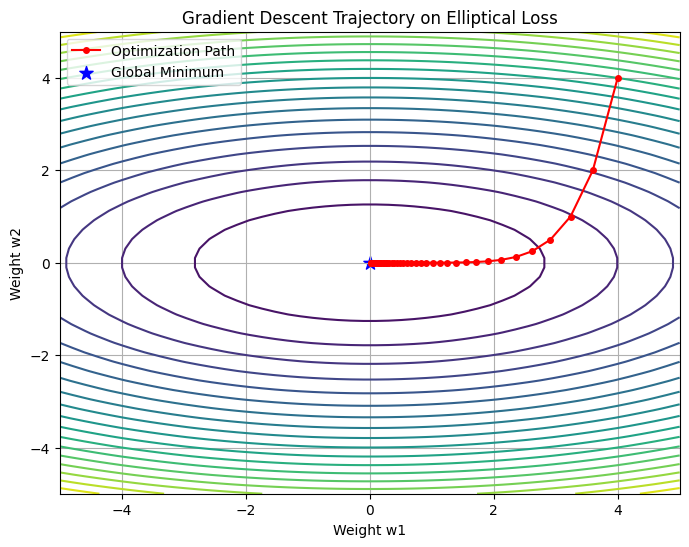

In [ ]:
# REFER CODE
import numpy as np
import matplotlib.pyplot as plt
# 1. Define Loss and Gradient
def loss_function(w1, w2):
    return w1**2 + 5 * w2**2
def compute_loss_gradient(w1, w2):
    # Partial deriv w.r.t w1 is 2*w1
    # Partial deriv w.r.t w2 is 10*w2
    return np.array([2*w1, 10*w2])
# 2. Gradient Descent Settings
w = np.array([4.0, 4.0]) # Initialization
learning_rate = 0.05
iterations = 50
history = []
# 3. Optimization Loop
for i in range(iterations):
    history.append(w.copy())
    grad = compute_loss_gradient(w[0], w[1])
    # Update rule: w = w - alpha * gradient
    w = w - learning_rate * grad
history = np.array(history)
# 4. Visualization
# Setup contour plot
w1_range = np.linspace(-5, 5, 50)
w2_range = np.linspace(-5, 5, 50)
W1, W2 = np.meshgrid(w1_range, w2_range)
Z = loss_function(W1, W2)
plt.figure(figsize=(8, 6))
plt.contour(W1, W2, Z, levels=20, cmap='viridis')
plt.plot(history[:,0], history[:,1], 'r-o', label='Optimization Path', markersize=4)
plt.scatter(0, 0, color='blue', marker='*', s=100, label='Global Minimum')
plt.title("Gradient Descent Trajectory on Elliptical Loss")
plt.xlabel("Weight w1")
plt.ylabel("Weight w2")
plt.legend()
plt.grid(True)
plt.show()

## **3. Gradients of Vector-Valued Functions (The Jacobian)**

We have discussed scalar-valued functions (like loss functions).

However, inside a neural network, layers act as vector-valued functions.
A hidden layer takes an input vector $\mathbf{x} \in \mathbb{R}^n$, multiplies it by a weight matrix, and produces an output vector $\mathbf{y} \in \mathbb{R}^m$. To train these layers, we need to understand the derivative of a vector with respect to another vector.

This derivative is a matrix called the Jacobian.

Imagine you are running a chemical factory.
- The Inputs ($\mathbf{x}$): You have a control panel with 3 dials: Temperature, Pressure, and Chemical Mix Ratio ($n=3$).
- The Outputs ($\mathbf{y}$): The factory produces 2 distinct products: Plastic and Rubber ($m=2$).
- The Function: The machinery that turns raw settings into product yields.

The Jacobian is your "Sensitivity Matrix." It is a $2 \times 3$ table (2 Products $\times$ 3 Dials).

- Row 1 (Plastic): Tells you how Plastic yield changes if you tweak Temperature (Col 1), Pressure (Col 2), or Mix (Col 3).
  - Ex: If the entry $J_{1,1}$ is high, it means Plastic yield is very sensitive to Temperature.
- Row 2 (Rubber): Tells you how Rubber yield changes if you tweak Temperature (Col 1), Pressure (Col 2), or Mix (Col 3).
  - Ex: If $J_{2,3}$ is zero, it means adjusting the Chemical Mix has no effect on Rubber production.
  
This matrix tells you exactly which knobs to turn to adjust specific outputs.


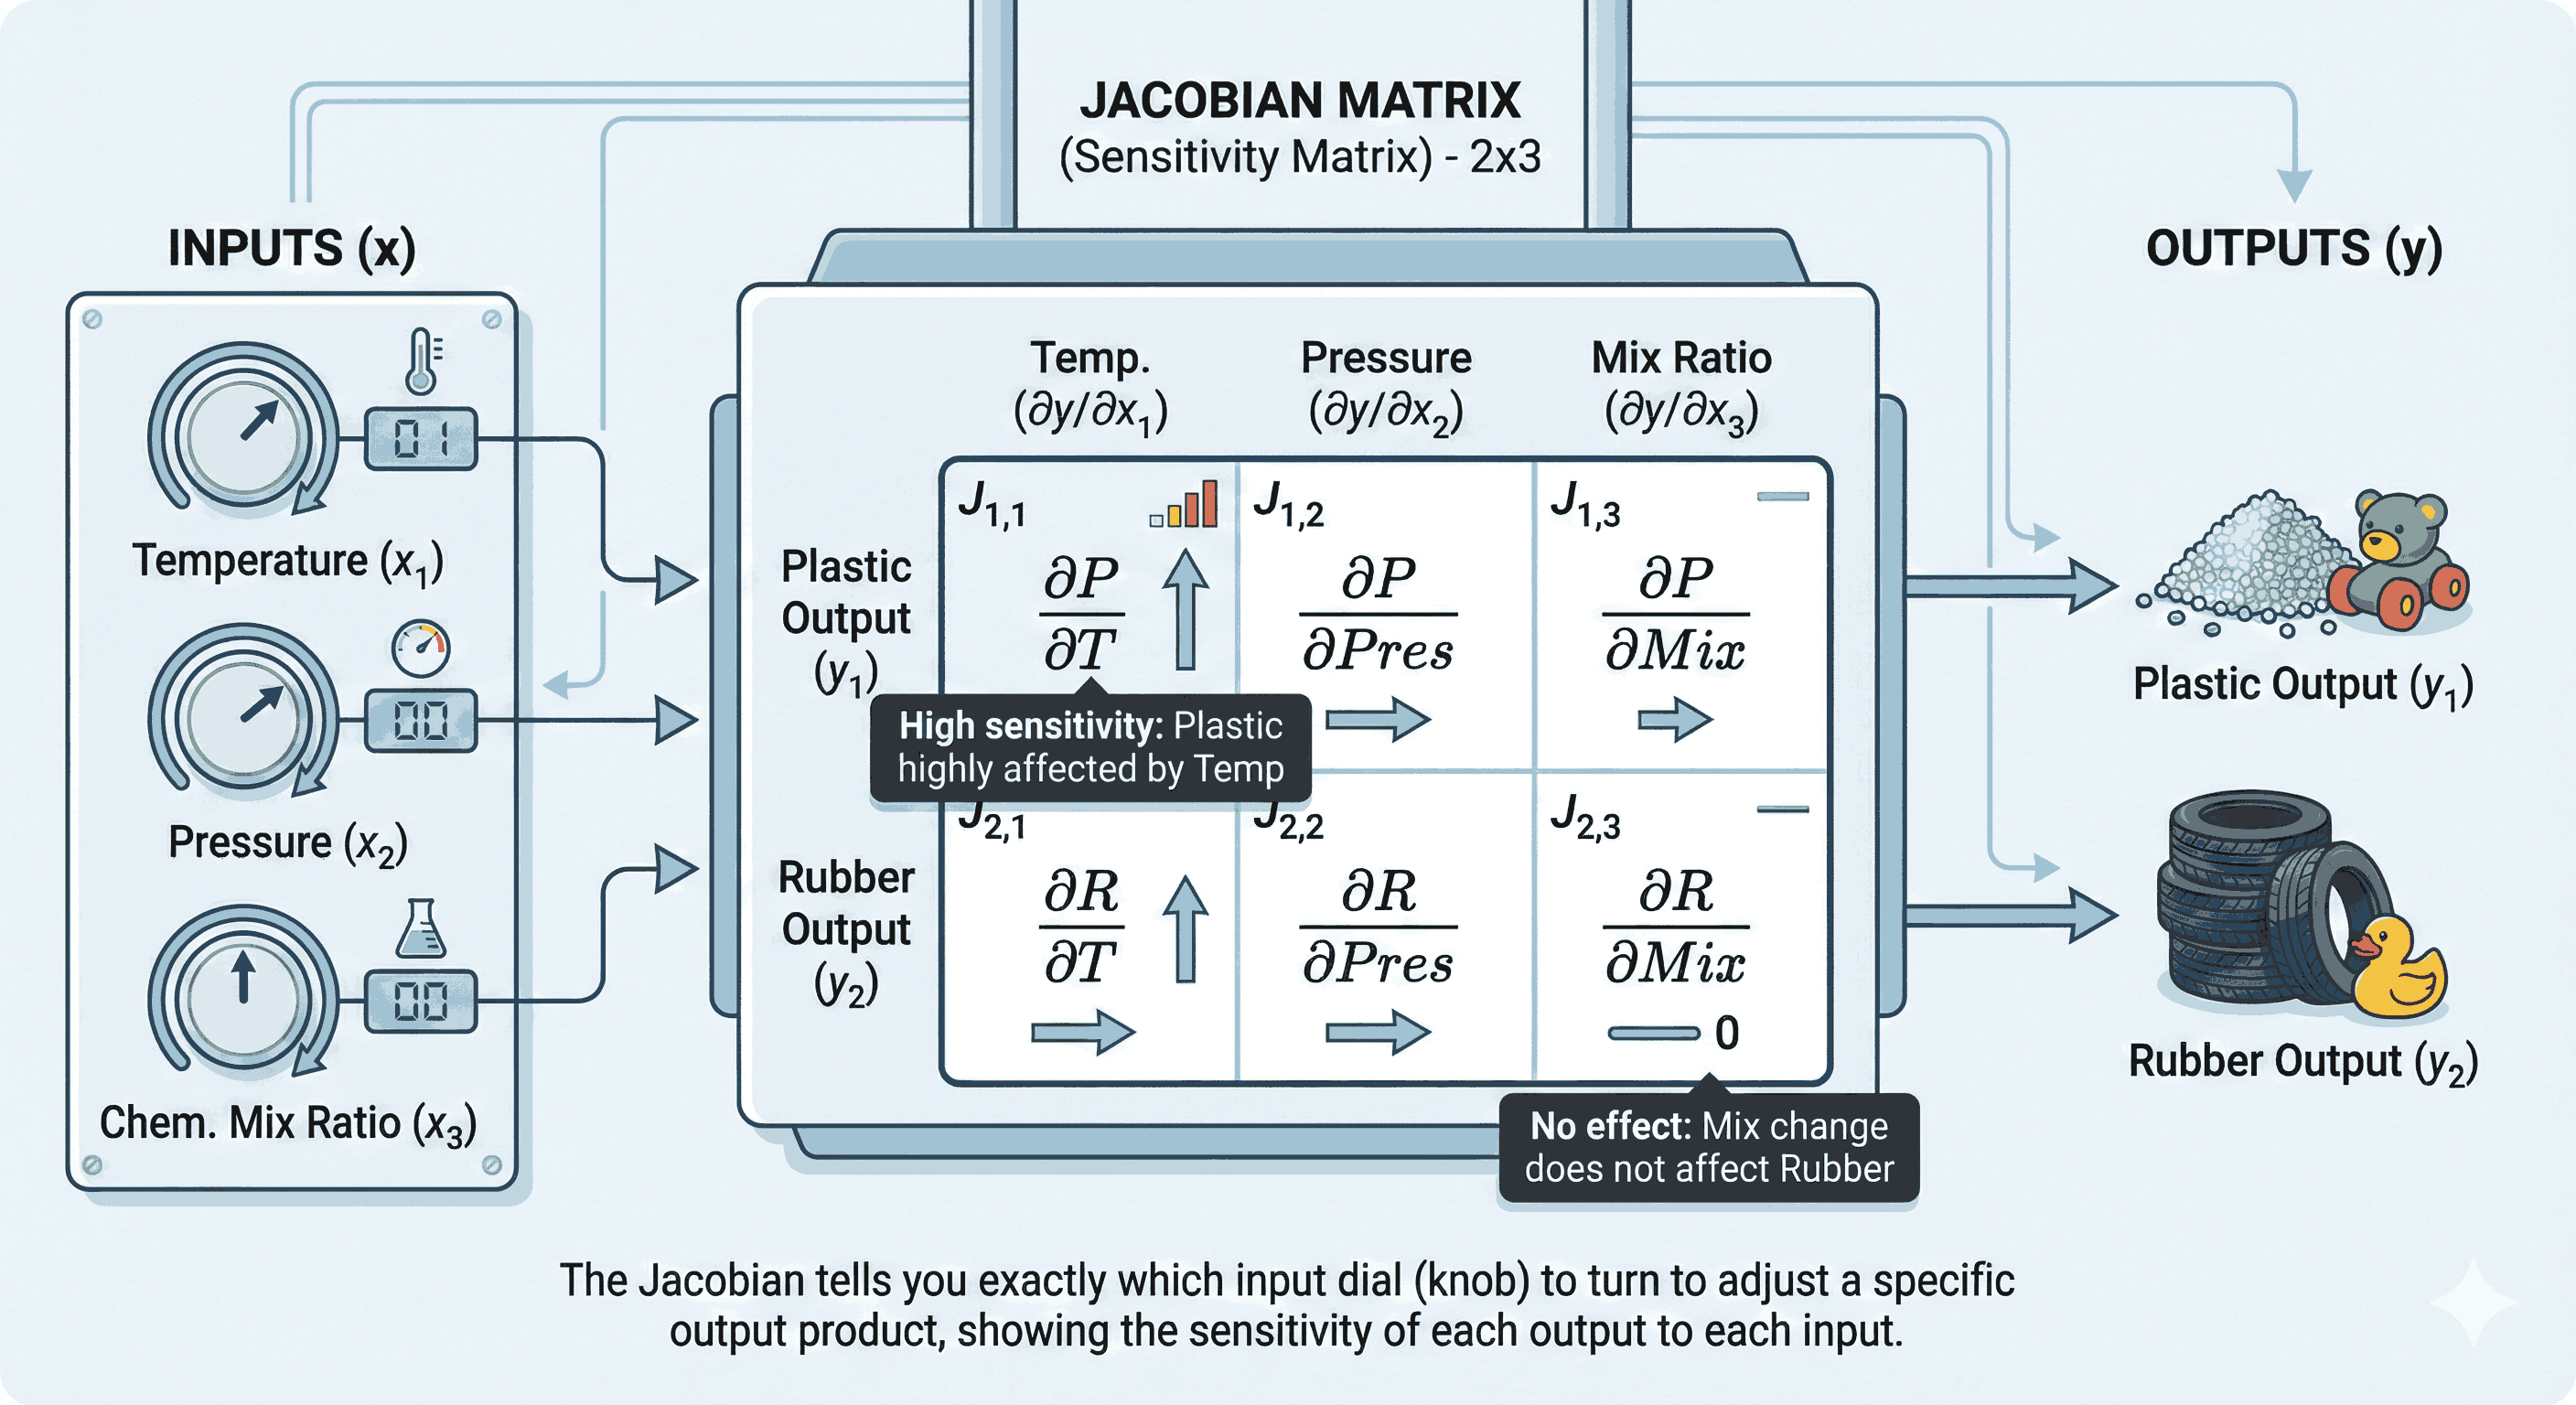

In [ ]:
##Calculating Jacobians by hand is tedious and error-prone. We can use Python's symbolic math library, SymPy, to derive them automatically.
import sympy as sp

# 1. Define symbolic variables
x, y = sp.symbols('x y')

# 2. Define a vector-valued function f: R^2 -> R^2
# f1(x, y) = x^2 * y
# f2(x, y) = 5x + sin(y)
f_vector = sp.Matrix([x**2 * y, 5*x + sp.sin(y)])
variables = sp.Matrix([x, y])

# 3. Compute the Jacobian
J = f_vector.jacobian(variables)

print("Original Function Vector f(x,y):")
sp.pprint(f_vector)
print("\nJacobian Matrix J:")
sp.pprint(J)

# 4. Evaluate at a specific point, say x=1, y=pi
# We use 'subs' to substitute values into the symbolic expression
J_evaluated = J.subs({x: 1, y: sp.pi})
print("\nJacobian evaluated at (1, pi):")
sp.pprint(J_evaluated)

Original Function Vector f(x,y):
⎡     2      ⎤
⎢    x ⋅y    ⎥
⎢            ⎥
⎣5⋅x + sin(y)⎦

Jacobian Matrix J:
⎡          2  ⎤
⎢2⋅x⋅y    x   ⎥
⎢             ⎥
⎣  5    cos(y)⎦

Jacobian evaluated at (1, pi):
⎡2⋅π  1 ⎤
⎢       ⎥
⎣ 5   -1⎦


## Task 3.1 : Jacobian of a Softmax Layer.

Understand the sensitivity of the Softmax activation function, which converts raw model scores (logits) into probabilities.

Context:

The Softmax function for a vector $\mathbf{z} \in \mathbb{R}^3$ is defined as $S(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{k=1}^3 e^{z_k}}$.

This maps 3 inputs to 3 outputs, so the derivative is a $3 \times 3$ Jacobian matrix.

Implementation:
- Using SymPy, define a vector $\mathbf{z} = [z_1, z_2, z_3]$.
- Define the softmax function symbolically (calculate the exponentials, sum them, and divide each exponential by the sum).
- Compute the Jacobian matrix using the .jacobian method.

Analysis:

Look at the diagonal entries vs the off-diagonal entries of the resulting matrix.
- Are the diagonal terms positive or negative?
- Are the off-diagonal terms positive or negative?
- What does this imply?
- If I increase the score $z_1$, does the probability $S_1$ go up or down? What happens to $S_2$?

In [ ]:
#REFER CODE
import sympy as sp

# 1. Setup Symbols
z1, z2, z3 = sp.symbols('z1 z2 z3')
z = sp.Matrix([z1, z2, z3])

# 2. Define Softmax
exps = [sp.exp(zi) for zi in z]
denominator = sum(exps)
softmax_func = sp.Matrix([e / denominator for e in exps])

# 3. Compute Jacobian
J = softmax_func.jacobian(z)

# 4. Simplify and Display
print("Jacobian of Softmax (3 inputs):")
# We use simplify to make the structure obvious
sp.pprint(sp.simplify(J))

# Analytical check:
# Diagonal terms J_ii should be S_i * (1 - S_i) -> Always positive
# Off-diagonal terms J_ij should be -S_i * S_j   -> Always negative
#WRITE CODE HERE

Jacobian of Softmax (3 inputs):
⎡ ⎛ z₂    z₃⎞  z₁          z₁ + z₂             z₁ + z₃     ⎤
⎢ ⎝ℯ   + ℯ  ⎠⋅ℯ          -ℯ                  -ℯ            ⎥
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢                 2                   2                   2⎥
⎢⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞ ⎥
⎢⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠ ⎥
⎢                                                          ⎥
⎢      z₁ + z₂        ⎛ z₁    z₃⎞  z₂          z₂ + z₃     ⎥
⎢    -ℯ               ⎝ℯ   + ℯ  ⎠⋅ℯ          -ℯ            ⎥
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢                 2                   2                   2⎥
⎢⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞   ⎛ z₁    z₂    z₃⎞ ⎥
⎢⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠   ⎝ℯ   + ℯ   + ℯ  ⎠ ⎥
⎢                                                          ⎥
⎢      z₁ + z₃             z₂ + z₃        ⎛ z₁    z₂⎞  z₃  ⎥
⎢    -ℯ                  -ℯ               ⎝ℯ   + ℯ  ⎠

## **4. Matrix Calculus & Identities**

In the previous module, we looked at vectors. But in deep learning, our parameters are often stored in matrices. A weight matrix $W$ connects two layers. When we train the network, we need the gradient of the loss $L$ with respect to the matrix $W$. This gives us $\frac{\partial L}{\partial W}$.

**5.1 Gradients of Matrices**

If $L$ is a scalar and $W$ is a matrix of size $M \times N$, then $\frac{\partial L}{\partial W}$ is also a matrix of size $M \times N$, where each element is the partial derivative of $L$ with respect to that specific weight $W_{ij}$.$$ \frac{\partial L}{\partial W} = \begin{bmatrix}\frac{\partial L}{\partial W_{11}} & \cdots & \frac{\partial L}{\partial W_{1N}} \\vdots & \ddots & \vdots \\frac{\partial L}{\partial W_{M1}} & \cdots & \frac{\partial L}{\partial W_{MN}}\end{bmatrix} $$

This preservation of shape is crucial for implementation: the gradient matrix must have the same shape as the weight matrix so we can subtract them: $W_{new} = W_{old} - \alpha \frac{\partial L}{\partial W}$.

**5.2 Common Identities**

Deriving these element-by-element is painful. We use matrix calculus identities to speed this up. Here are two that appear constantly in linear regression and neural networks:
1. Gradient of a linear transformation:  
- If $y = Wx$, what is $\frac{\partial y}{\partial x}$?
- Result: $W$ (or $W^T$, depending on layout convention). In numerator layout (used here): $\frac{\partial (Ax)}{\partial x} = A$.
2. Gradient of a quadratic form:  
- If $L = x^T A x$ (common in least squares optimization), then:$\frac{\partial L}{\partial x} = (A + A^T)x$.
- If $A$ is symmetric (like a covariance matrix), this simplifies to $2Ax$. This looks remarkably like the scalar derivative $\frac{d}{dx}(ax^2) = 2ax$.

In [ ]:
#We will numerically verify the quadratic form identity.
import numpy as np

def numerical_gradient(f, x, h=1e-5):
    """ Computes gradient of scalar function f w.r.t vector x numerically. """
    grad = np.zeros_like(x)
    # Iterate over each element of x
    for i in range(len(x)):
        x_plus = x.copy()
        x_plus[i] += h
        x_minus = x.copy()
        x_minus[i] -= h
        # Central difference for better accuracy
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * h)
    return grad

# Setup
A = np.array([[3.0, 1.0], [1.0, 2.0]]) # Symmetric matrix
x = np.array([1.0, 2.0])

# Define Quadratic Form function: f(x) = x^T A x
def quad_form(vec):
    return vec.T @ A @ vec

# 1. Analytical Gradient: 2Ax (since A is symmetric)
grad_analytic = 2 * A @ x

# 2. Numerical Gradient
grad_numeric = numerical_gradient(quad_form, x)

print("Matrix A:\n", A)
print("Vector x:", x)
print("Analytical Gradient (2Ax):", grad_analytic)
print("Numerical Gradient:", grad_numeric)

Matrix A:
 [[3. 1.]
 [1. 2.]]
Vector x: [1. 2.]
Analytical Gradient (2Ax): [10. 10.]
Numerical Gradient: [10. 10.]


## Task 4.1 : Gradient of Least Squares

Derive and verify the gradient for the Linear Regression loss function.

In linear regression, we predict $\hat{y} = Xw$, where $X$ is our data matrix and $w$ is our weight vector.

- Loss Function: We want to minimize the Mean Squared Error (MSE):$$L(w) = ||Xw - y||^2 = (Xw - y)^T (Xw - y)$$
- Analytical derivation: The gradient of this loss with respect to $w$ is known to be:$$\nabla_w L = 2X^T (Xw - y)$$
- Create a random data matrix $X$ ($10 \times 3$) and target vector $y$ ($10 \times 1$).
- Initialize random weights $w$ ($3 \times 1$).
- Define the MSE function in Python.
- Compute the gradient using the formula $2X^T (Xw - y)$.
- Compute the gradient numerically using the numerical_gradient function provided above.
- Compare the two vectors to confirm they match.

In [ ]:
#WRITE CODE HERE

## **5. Backpropagation and Automatic Differentiation**

The chain rule is the most important rule in Deep Learning. It allows us to calculate the gradient of a complex composite function by multiplying the derivatives of its nested parts. Backpropagation is simply the efficient application of the chain rule to the specific structure of neural networks.

**6.1 The Chain Rule and Computational Graphs**

If $y = f(u)$ and $u = g(x)$, then the derivative of $y$ with respect to $x$ is:$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

Imagine a "Telephone Game" line of people: Alice $\to$ Bob $\to$ Charlie $\to$ Dave.
1. Alice whispers a number to Bob.
2. Bob doubles it and tells Charlie.
3. Charlie squares it and tells Dave.
4. Dave adds 5 and yells the result (the "Loss").

We want to know: How much does Dave's final yell change if Alice changes her whisper slightly?
- Forward Differentiation:
  1. Alice changes her number slightly.
  2. We calculate how Bob changes.
  3. Then we calculate how Charlie changes based on Bob.
  4. Then Dave based on Charlie.
  5. We propagate the change forward.
- Reverse Mode (Backpropagation):
  1. We start at the end.
  2. Dave says, "I changed by 1 unit."
  3. He looks at Charlie and asks, "How sensitive is my output to your input?" (The derivative).
  4. Then Charlie looks at Bob and asks the same.
  5. The "blame" (gradient) is propagated backward.

Why Backprop? In ML, we usually have one output (Loss) but millions of inputs (weights).
- Forward mode requires a pass for each input. (Millions of passes).
- Reverse mode requires one single pass backward to get gradients for all inputs simultaneously. This efficiency is why deep learning is possible.

AutoDiff is the technology inside PyTorch/TensorFlow. It is neither manual differentiation (doing math by hand) nor numerical differentiation.

Instead, it breaks a program down into elementary operations ($+, -, *, \sin, \exp$) and applies the chain rule to these operations automatically.

We will build a tiny engine that can differentiate a simple expression $f(x, y) = x \cdot y$. This illustrates how PyTorch stores gradients.

In [ ]:
class Value:
    """ Stores a scalar value and its gradient. """
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0.0  # Stores the derivative dL/d(this_node)
        self._backward = lambda: None # Function to propagate gradient backward
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

    def __add__(self, other):
        # Forward pass: z = x + y
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        # Backward pass definition: dz/dx = 1, dz/dy = 1
        # Chain rule: dL/dx = dL/dz * dz/dx
        # We accumulate gradients (+=) because a node might be used multiple times.
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        # Forward pass: z = x * y
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        # Backward pass definition: dz/dx = y, dz/dy = x
        def _backward():
            self.grad += other.data * out.grad # dL/dx = dL/dz * y
            other.grad += self.data * out.grad # dL/dy = dL/dz * x
        out._backward = _backward
        return out

    def backward(self):
        # Topological sort to ensure we backprop in correct order (parents before children)
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # Seed the gradient of the final node (dL/dL = 1)
        self.grad = 1.0
        # Apply chain rule in reverse
        for node in reversed(topo):
            node._backward()

# --- Example Usage ---
# We want to differentiate f = x * y + x w.r.t x and y
x = Value(2.0)
y = Value(3.0)
f = x * y + x  # f = xy + x. At (2,3), f = 6 + 2 = 8

# Forward pass happens immediately
print(f"Forward pass result: {f.data}")

# Backward pass
f.backward()

print(f"Gradient df/dx (should be y+1 = 4): {x.grad}")
print(f"Gradient df/dy (should be x = 2): {y.grad}")

Forward pass result: 8.0
Gradient df/dx (should be y+1 = 4): 4.0
Gradient df/dy (should be x = 2): 2.0


## Task 5.1: Extending the Autograd Engine

Extend the micro-autograd engine to support a Rectified Linear Unit (ReLU) neuron, the fundamental building block of modern deep networks.

1. Extend Class: Add a relu() method to the Value class.

  - ReLU (Rectified Linear Unit): $f(x) = \max(0, x)$.
  - Forward Logic: If self.data > 0, return self.data. Else return 0.
  - Backward Logic:
    - If self.data > 0, pass the gradient through unchanged ($ \times 1$).
    - If self.data <= 0, kill the gradient ($ \times 0$).
2. Simulate a Neuron: Create a "Neuron" computation: $z = \text{ReLU}(w \cdot x + b)$.
3. Compute: Initialize $w=-1.5, x=2.0, b=1.0$.
  - Forward pass: Compute $z$.
  - Backward pass: Compute gradients for $w, x, b$.

Why is the gradient zero for some variables? (Hint: check if the neuron "fired").

In [ ]:
#WRITE CODE HERE

## **6. Higher-Order Derivatives & Curvature**

While the gradient (first derivative) tells us the slope, the Hessian (second derivative) tells us the curvature of the function. It tells us how the gradient itself is changing. This is vital for understanding optimization stability
- whether a minimum is a narrow ravine (hard to find)
- or a wide valley (easy to find).   

Return to our mountain hiker. The gradient tells you which way is "up". The Hessian tells you about the shape of the ground under your feet.

- Positive Definite Hessian:
  - You are standing in a bowl.
  - All directions curve upward.
  - This is a local minimum.

- Negative Definite Hessian:
  - You are standing on a peak.
  - All directions curve downward.
  - This is a local maximum.

***Indefinite Hessian:***
- One direction goes up, another goes down.
- You are in a saddle point (like a horse saddle).
- Saddle points are notoriously difficult for optimization algorithms because the gradient is zero (flat), but it's not a valid solution.   

## Task 6.1: Classify Critical Points.

Use the Hessian to classify critical points (where gradient is zero) as minima, maxima, or saddle points.

- Function: $f(x, y) = x^3 - 3x + y^2$.
- Critical Points: Use SymPy to find points where the gradient is $$.
- Hessian: Compute the Hessian matrix symbolically.
- Classification: For each critical point:
  - Substitute coordinates into the Hessian.
  - Calculate the eigenvalues.
  - Rule:
    - All eigenvalues > 0 $\to$ Minimum.
    - All < 0 $\to$ Maximum.
    - Mixed signs $\to$ Saddle Point.

In [ ]:
#VISUALISE THE FUNCTION BEFORE ATTEMPTING THE TASK

import numpy as np
import plotly.graph_objects as go

# Define function
def f(x, y):
    return x**3 - 3*x + y**2

# Grid
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Critical points
critical_points = [(-1, 0), (1, 0)]

# Create surface
fig = go.Figure()

fig.add_trace(go.Surface(
    x=X,
    y=Y,
    z=Z,
    showscale=True,
    opacity=0.9
))

# Add critical points
for px, py in critical_points:
    fig.add_trace(go.Scatter3d(
        x=[px],
        y=[py],
        z=[f(px, py)],
        mode='markers',
        marker=dict(size=6),
        name=f'Critical Point ({px},{py})'
    ))

fig.update_layout(
    title="Interactive Surface: f(x,y) = x^3 - 3x + y^2",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='f(X,Y)'
    ),
    width=900,
    height=700
)

fig.show()

In [ ]:
#REFER CODE
import sympy as sp

x, y = sp.symbols('x y')
f = x**3 - 3*x + y**2

# 1. Gradient
grad = [sp.diff(f, var) for var in (x, y)]

# 2. Solve for Critical Points
critical_points = sp.solve(grad, (x, y))

# 3. Hessian
hessian = sp.Matrix([[sp.diff(f, v1, v2) for v1 in (x, y)] for v2 in (x, y)])

# 4. Analyze
for point in critical_points:
    H_val = hessian.subs({x: point[0], y: point[1]})  # <-- FIX
    eigenvals = list(H_val.eigenvals().keys())
    print(f"Point {point}: Eigenvals {eigenvals}")

#WRITE CODE HERE

Point (-1, 0): Eigenvals [-6, 2]
Point (1, 0): Eigenvals [6, 2]


## **7. Linearization and Multivariate Taylor Series**

Taylor series allow us to approximate complex, non-linear functions with simpler polynomial functions. In machine learning, we typically stop at the first or second order. This is the mathematical justification for why gradient descent works (first-order approximation)

- Imagine you are locating yourself on a geographical map:

  - 0-Order: "The height here is 500m." (Assumes the whole world is flat).

  - 1st-Order (Linear): "The height is 500m, and the slope is rising North." (Models the world as a slanted ramp).

  - 2nd-Order (Quadratic): "The height is 500m, rising North, but the slope is getting less steep." (Models the world as a curved hill).


1. Gradient descent uses the "Slanted Ramp" model to decide where to step.
2. Newton's method uses the "Curved Hill" model to jump straight to the bottom of the bowl.

## Task 7.1 : 2D Taylor Approximation

Visualize how well a quadratic approximation fits a non-linear function locally.
1. Function: $f(x, y) = e^x \cos(y)$. Center point $\mathbf{a} = (0, 0)$.
2. Derive: Compute $\nabla f(0,0)$ and $\mathbf{H}(0,0)$.
3. Construct: Implement the quadratic approximation formula in Python.
4. Visualize: Create a 3D plot using plot_surface. Show the true function (transparent) and the quadratic approximation (wireframe).
5. Observe: How far from $(0,0)$ does the approximation hold up?

In [ ]:
#WRITE CODE HERE